In [1]:
import numpy as np
import sympy
import math
import matplotlib.pyplot as plt

In [2]:
#Tamaños estándar humanos en mm (radio)
radio_cornea = 12/2
radio_ojo = 25/2

In [3]:
## Prueba Q1 y Q4 -- OK, resultado bueno [1]
x1 = 4
y1 = 1
x2 = 4
y2 = -1
ri = 20
d_arcos = 0.2

In [123]:
## Prueba Q1 y Q2 -- NO SE PUEDE RESOLVER!!!!
x1 = 1
y1 = 4
x2 = -1
y2 = 4
ri = 20
d_arcos = 0.2


In [89]:
## Prueba Q2 y Q3 -- invertido, resultado bueno [1]
x1 = -4
y1 = 1
x2 = -4
y2 = -1
ri = 20
d_arcos = 0.2

In [102]:
## Prueba Q3 y Q4 -- NO SE PUEDE RESOLVER!!!!
x1 = -1
y1 = -4
x2 = 1
y2 = -4
ri = 20
d_arcos = 0.2

In [61]:
## Prueba en Q1 -- OK, resultado bueno [1]
x1 = 2
y1 = 3
x2 = 3
y2 = 2
ri = 20
d_arcos = 0.2

In [57]:
## Prueba en Q2  -- invertido, resultado bueno [1]
x1 = -2
y1 = 3
x2 = -3
y2 = 2
ri = 20
d_arcos = 0.2

In [110]:
## Prueba en Q3 -- invertido, resultado bueno [1]
x1 = -2
y1 = -3
x2 = -3
y2 = -2
ri = 20
d_arcos = 0.2

In [73]:
## Prueba en Q4 -- OK, resultado bueno [1]
x1 = 2
y1 = -3
x2 = 3
y2 = -2
ri = 20
d_arcos = 0.2

In [4]:
def calcula_parametros(x1, y1, x2, y2, ri, d_arcos):
    '''
    Inputs: x1, y1, x2, y2, ri, d_arcos
    Incógnitas/Outputs: cxe, cye, cxi, cyi, ri
    eq1 = Circunferencia externa pasa por punto 1
    eq2 = Circunferencia externa pasa por punto 2
    eq3 = Circunferencia interna pasa por punto 1
    eq4 = Circunferencia interna pasa por punto 2
    eq5 = Distancia entre los arcos (aunque supone que están alineados los centros)
    '''
    cxe, cye, cxi, cyi, re = sympy.symbols("cxe cye cxi cyi re", real=True)

    eq1 = sympy.Eq((x1 - cxe)**2 + (y1 - cye)**2 -(re**2), 0)
    eq2 = sympy.Eq((x2 - cxe)**2 + (y2 - cye)**2 -(re**2), 0)

    eq3 = sympy.Eq((x1 - cxi)**2 + (y1 - cyi)**2 -(ri**2), 0)
    eq4 = sympy.Eq((x2 - cxi)**2 + (y2 - cyi)**2 -(ri**2), 0)

    eq5 = sympy.Eq(re - ri + sympy.sqrt((cxe-cxi)**2+(cye-cyi)**2) - d_arcos, 0)

    result = sympy.solve([eq1, eq2, eq3, eq4, eq5])
    
    cxe = float(result[1][cxe].evalf())
    cye = float(result[1][cye].evalf())
    cxi = float(result[1][cxi].evalf())
    cyi = float(result[1][cyi].evalf())
    re = float(result[1][re].evalf())
    
#     cxe = float(result[0][cxe].evalf())
#     cye = float(result[0][cye].evalf())
#     cxi = float(result[0][cxi].evalf())
#     cyi = float(result[0][cyi].evalf())
#     re = float(result[0][re].evalf())
        
    return cxe, cye, cxi, cyi, re

In [5]:
cxe, cye, cxi, cyi, re = calcula_parametros(x1, y1, x2, y2, ri, d_arcos)

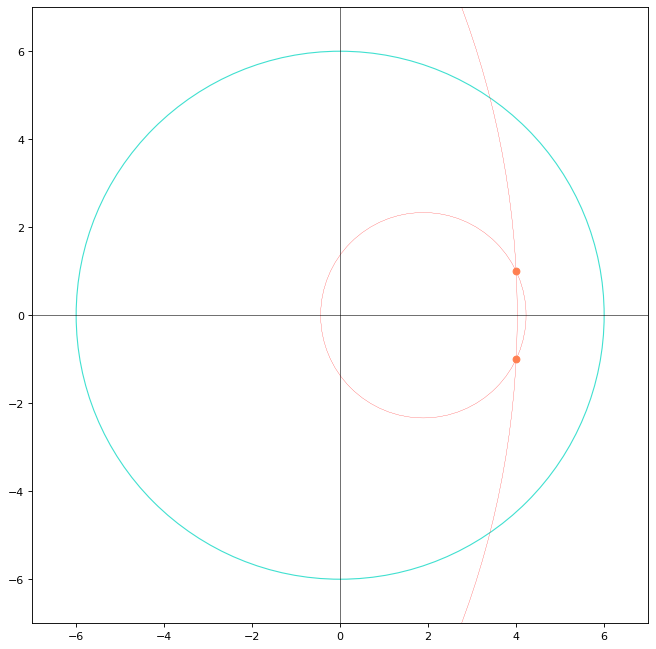

In [6]:
plt.figure(figsize=(10, 10), dpi=80)
fig, ax =  plt.subplots()

cornea = plt.Circle((0, 0), radio_cornea, color='turquoise', fill=False)
corte_externo = plt.Circle((cxe, cye), re, color='red', fill=False, linewidth=0.2)
corte_interno = plt.Circle((cxi, cyi), ri, color='red', fill=False, linewidth=0.2)

ax = plt.gca()
ax.cla() # clear things for fresh plot

plt.gca().set_aspect('equal') # Para que el gráfico sea cuadrado

# change default range so that new circles will work
ax.set_xlim((-7, 7))
ax.set_ylim((-7, 7))

# plot point
ax.plot((x1), (y1), 'o', color='coral')
ax.plot((x2), (y2), 'o', color='coral')

# plot axis
plt.axvline(x = 0, color = 'k', linewidth=0.5)
plt.axhline(y = 0, color = 'k', linewidth=0.5)
    
ax.add_patch(cornea)
ax.add_patch(corte_externo)
ax.add_patch(corte_interno)



In [35]:
distancia_entre_arcos = re + math.sqrt(cxe**2 + cye**2) - ri + math.sqrt(cxi**2 + cyi**2)
distancia_entre_arcos

47.24605999447884

In [114]:
print(cxe, cye)

-3.256743551989603 -3.256743551989603


In [115]:
print(cxi, cyi)

-16.63329402510257 -16.63329402510257


In [36]:
re - ri + math.sqrt((cxe-cxi)**2+(cye-cyi)**2)

0.20000000000000007

In [13]:
def calcula_angulo(d_arcos, profundidad):
    '''
    inputs: d_arcos: distáncia entre los arcos
            profundidad: profundidad donde deben cortarse los arcos
            
    outputs: angulo_externo: ángulo de corte para la sección más externa
             angulo_interno: ángulo de corte para la sección más interna (+ cercana centro ojo)
    '''
    angulo_externo = math.degrees(math.atan(profundidad/(d_arcos*0.5)))
    angulo_interno = 180 - angulo_externo
    return angulo_externo, angulo_interno

In [14]:
angulo_externo, angulo_interno = calcula_angulo(d_arcos, 0.3)

In [15]:
angulo_externo, angulo_interno

(71.56505117707799, 108.43494882292201)